## PROBLEM STATEMENT:
## Given the google rating data, use a hierarchical clustering algorithm to cluster reviews.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("google_review_ratings.csv")
df

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0        User 1        0.00        0.00        3.63        3.65        5.00   
1        User 2        0.00        0.00        3.63        3.65        5.00   
2        User 3        0.00        0.00        3.63        3.63        5.00   
3        User 4        0.00        0.50        3.63        3.63        5.00   
4        User 5        0.00        0.00        3.63        3.63        5.00   
...         ...         ...         ...         ...         ...         ...   
5451  User 5452        0.91        5.00        4.00        2.79        2.77   
5452  User 5453        0.93        5.00        4.02        2.79        2.78   
5453  User 5454        0.94        5.00        4.03        2.80        2.78   
5454  User 5455        0.95        4.05        4.05        2.81        2.79   
5455  User 5456        0.95        4.07        5.00        2.82        2.80   

      Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0           2.92        5.00        2.35        2.33  ...         0.59   
1           2.92        5.00        2.64        2.33  ...         0.59   
2           2.92        5.00        2.64        2.33  ...         0.59   
3           2.92        5.00        2.35        2.33  ...         0.59   
4           2.92        5.00        2.64        2.33  ...         0.59   
...          ...         ...         ...         ...  ...          ...   
5451        2.57        2.43        1.09        1.77  ...         0.66   
5452        2.57        1.77        1.07        1.76  ...         0.65   
5453        2.57        1.75        1.05        1.75  ...         0.65   
5454        2.44        1.76        1.03        1.74  ...         0.64   
5455        2.57        2.42        1.02        1.74  ...         0.64   

     Category 17  Category 18  Category 19  Category 20  Category 21  \
0           0.50         0.00         0.50         0.00         0.00   
1           0.50         0.00         0.50         0.00         0.00   
2           0.50         0.00         0.50         0.00         0.00   
3           0.50         0.00         0.50         0.00         0.00   
4           0.50         0.00         0.50         0.00         0.00   
...          ...          ...          ...          ...          ...   
5451        0.65         0.66         0.69         5.00         1.05   
5452        0.64         0.65         1.59         1.62         1.06   
5453        0.63         0.64         0.74         5.00         1.07   
5454        0.63         0.64         0.75         5.00         1.08   
5455        0.62         0.63         0.78         5.00         1.08   

      Category 22  Category 23  Category 24  Unnamed: 25  
0             0.0          0.0         0.00          NaN  
1             0.0          0.0         0.00          NaN  
2             0.0          0.0         0.00          NaN  
3             0.0          0.0         0.00          NaN  
4             0.0          0.0         0.00          NaN  
...           ...          ...          ...          ...  
5451          5.0          5.0         1.56          NaN  
5452          5.0          5.0         1.09          NaN  
5453          5.0          5.0         1.11          NaN  
5454          5.0          5.0         1.12          NaN  
5455          5.0          5.0         1.17          NaN  

[5456 rows x 26 columns]

In [25]:
pd.set_option('display.max_columns', None)
df

ratings on churches  ratings on resorts  ratings on beaches  \
0                    0.00                0.00                3.63   
1                    0.00                0.00                3.63   
2                    0.00                0.00                3.63   
3                    0.00                0.50                3.63   
4                    0.00                0.00                3.63   
...                   ...                 ...                 ...   
5451                 0.91                5.00                4.00   
5452                 0.93                5.00                4.02   
5453                 0.94                5.00                4.03   
5454                 0.95                4.05                4.05   
5455                 0.95                4.07                5.00   

      ratings on parks  ratings on threatres  ratings on museums  \
0                 3.65                  5.00                2.92   
1                 3.65                  5.00                2.92   
2                 3.63                  5.00                2.92   
3                 3.63                  5.00                2.92   
4                 3.63                  5.00                2.92   
...                ...                   ...                 ...   
5451              2.79                  2.77                2.57   
5452              2.79                  2.78                2.57   
5453              2.80                  2.78                2.57   
5454              2.81                  2.79                2.44   
5455              2.82                  2.80                2.57   

      ratings on malls  ratings on zoo  ratings on restaurants  \
0                 5.00            2.35                    2.33   
1                 5.00            2.64                    2.33   
2                 5.00            2.64                    2.33   
3                 5.00            2.35                    2.33   
4                 5.00            2.64                    2.33   
...                ...             ...                     ...   
5451              2.43            1.09                    1.77   
5452              1.77            1.07                    1.76   
5453              1.75            1.05                    1.75   
5454              1.76            1.03                    1.74   
5455              2.42            1.02                    1.74   

      ratings on pubs/bars  ratings on local services  \
0                     2.64                       1.70   
1                     2.65                       1.70   
2                     2.64                       1.70   
3                     2.64                       1.73   
4                     2.64                       1.70   
...                    ...                        ...   
5451                  1.04                       1.02   
5452                  1.02                       1.01   
5453                  1.00                       0.99   
5454                  0.98                       0.97   
5455                  0.96                       0.95   

      ratings on burger/pizza shops  ratings on hotels/other lodgings  \
0                              1.69                              1.70   
1                              1.69                              1.70   
2                              1.69                              1.70   
3                              1.69                              1.70   
4                              1.69                              1.70   
...                             ...                               ...   
5451                           1.06                              1.29   
5452                           1.04                              1.27   
5453                           1.00                              1.08   
5454                           0.98                              1.06   
5455                           0.96                              1.01   

     

In [3]:
df.shape

(5456, 26)

In [4]:
df.head(5)

User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 18  Category 19  Category 20  Category 21  \
0         0.5          0.0          0.5          0.0          0.0   
1         0.5          0.0          0.5          0.0          0.0   
2         0.5          0.0          0.5          0.0          0.0   
3         0.5          0.0          0.5          0.0          0.0   
4         0.5          0.0          0.5          0.0          0.0   

   Category 22  Category 23  Category 24  Unnamed: 25  
0          0.0          0.0          0.0          NaN  
1          0.0          0.0          0.0          NaN  
2          0.0          0.0          0.0          NaN  
3          0.0          0.0          0.0          NaN  
4          0.0          0.0          0.0          NaN  

[5 rows x 26 columns]

In [5]:
df.dtypes

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object

In [6]:
df.drop(["Unnamed: 25","User"],axis=1,inplace=True)#these columns doesn't provide any valuable information so we shall drop it

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

In [8]:
df["Category 11"]

0        1.7
1        1.7
2        1.7
3       1.73
4        1.7
        ... 
5451    1.02
5452    1.01
5453    0.99
5454    0.97
5455    0.95
Name: Category 11, Length: 5456, dtype: object

## Checking for missing values

In [9]:
df.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [10]:
df.fillna(df.mean().round(1),inplace=True)

In [11]:
df.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [12]:
df.rename(columns = {'Category 1':'ratings on churches',
                     'Category 2':'ratings on resorts',
                     'Category 3':'ratings on beaches',
                     'Category 4':'ratings on parks',
                     'Category 5':'ratings on threatres',
                     'Category 6':'ratings on museums',
                     'Category 7':'ratings on malls',
                     'Category 8':'ratings on zoo',
                     'Category 9':'ratings on restaurants',
                     'Category 10':'ratings on pubs/bars',
                     'Category 11':'ratings on local services',
                     'Category 12':'ratings on burger/pizza shops',
                     'Category 13':'ratings on hotels/other lodgings',
                     'Category 14':'ratings on juice bars',
                     'Category 15':'ratings on art galleries',
                     'Category 16':'ratings on dance clubs',
                     'Category 17':'ratings on swimming pools',
                     'Category 18':'ratings on gyms',
                     'Category 19':'ratings on bakeries',
                     'Category 20':'ratings on beauty & spas',
                     'Category 21':'ratings on cafes',
                     'Category 22':'ratings on viewpoints',
                     'Category 23':'ratings on monuments',
                     'Category 24':'ratings on gardens',
                      },inplace=True)#renaming the columns


In [13]:
df.head()

ratings on churches  ratings on resorts  ratings on beaches  \
0                  0.0                 0.0                3.63   
1                  0.0                 0.0                3.63   
2                  0.0                 0.0                3.63   
3                  0.0                 0.5                3.63   
4                  0.0                 0.0                3.63   

   ratings on parks  ratings on threatres  ratings on museums  \
0              3.65                   5.0                2.92   
1              3.65                   5.0                2.92   
2              3.63                   5.0                2.92   
3              3.63                   5.0                2.92   
4              3.63                   5.0                2.92   

   ratings on malls  ratings on zoo  ratings on restaurants  \
0               5.0            2.35                    2.33   
1               5.0            2.64                    2.33   
2               5.0            2.64                    2.33   
3               5.0            2.35                    2.33   
4               5.0            2.64                    2.33   

   ratings on pubs/bars  ... ratings on art galleries  ratings on dance clubs  \
0                  2.64  ...                     1.74                    0.59   
1                  2.65  ...                     1.74                    0.59   
2                  2.64  ...                     1.74                    0.59   
3                  2.64  ...                     1.74                    0.59   
4                  2.64  ...                     1.74                    0.59   

   ratings on swimming pools  ratings on gyms  ratings on bakeries  \
0                        0.5              0.0                  0.5   
1                        0.5              0.0                  0.5   
2                        0.5              0.0                  0.5   
3                        0.5              0.0                  0.5   
4                        0.5              0.0                  0.5   

   ratings on beauty & spas  ratings on cafes  ratings on viewpoints  \
0                       0.0               0.0                    0.0   
1                       0.0               0.0                    0.0   
2                       0.0               0.0                    0.0   
3                       0.0               0.0                    0.0   
4                       0.0               0.0                    0.0   

   ratings on monuments  ratings on gardens  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0  

[5 rows x 24 columns]

In [14]:
df['ratings on local services'].value_counts()

5        1046
1.56       80
1.58       75
1.76       67
1.75       66
         ... 
3.82        1
2\t2.       1
3.18        1
4.08        1
0.78        1
Name: ratings on local services, Length: 296, dtype: int64

In [15]:
df.loc[df['ratings on local services'] == "2\t2." ]

ratings on churches  ratings on resorts  ratings on beaches  \
2712                 1.71                1.68                1.46   

      ratings on parks  ratings on threatres  ratings on museums  \
2712              1.13                  1.12                1.15   

      ratings on malls  ratings on zoo  ratings on restaurants  \
2712              1.26            1.17                    1.59   

      ratings on pubs/bars  ... ratings on art galleries  \
2712                  0.85  ...                      5.0   

      ratings on dance clubs  ratings on swimming pools  ratings on gyms  \
2712                    1.08                        1.1             1.04   

      ratings on bakeries  ratings on beauty & spas  ratings on cafes  \
2712                  5.0                      4.43               5.0   

      ratings on viewpoints  ratings on monuments  ratings on gardens  
2712                    5.0                   5.0                2.57  

[1 rows x 24 columns]

In [16]:
df.drop([df.index[2712]],inplace=True)#to drop the particular row as it had string value

In [17]:
df.shape

(5455, 24)

In [18]:
df.dtypes

ratings on churches                 float64
ratings on resorts                  float64
ratings on beaches                  float64
ratings on parks                    float64
ratings on threatres                float64
ratings on museums                  float64
ratings on malls                    float64
ratings on zoo                      float64
ratings on restaurants              float64
ratings on pubs/bars                float64
ratings on local services            object
ratings on burger/pizza shops       float64
ratings on hotels/other lodgings    float64
ratings on juice bars               float64
ratings on art galleries            float64
ratings on dance clubs              float64
ratings on swimming pools           float64
ratings on gyms                     float64
ratings on bakeries                 float64
ratings on beauty & spas            float64
ratings on cafes                    float64
ratings on viewpoints               float64
ratings on monuments            

In [19]:
df["ratings on local services"]=df["ratings on local services"].apply(pd.to_numeric)#to convert to int value

In [20]:
df.dtypes

ratings on churches                 float64
ratings on resorts                  float64
ratings on beaches                  float64
ratings on parks                    float64
ratings on threatres                float64
ratings on museums                  float64
ratings on malls                    float64
ratings on zoo                      float64
ratings on restaurants              float64
ratings on pubs/bars                float64
ratings on local services           float64
ratings on burger/pizza shops       float64
ratings on hotels/other lodgings    float64
ratings on juice bars               float64
ratings on art galleries            float64
ratings on dance clubs              float64
ratings on swimming pools           float64
ratings on gyms                     float64
ratings on bakeries                 float64
ratings on beauty & spas            float64
ratings on cafes                    float64
ratings on viewpoints               float64
ratings on monuments            

In [21]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

ratings on churches  ratings on resorts  ratings on beaches  \
0                  0.0            0.000000            0.333580   
1                  0.0            0.000000            0.331487   
2                  0.0            0.000000            0.331762   
3                  0.0            0.045907            0.333288   
4                  0.0            0.000000            0.331762   

   ratings on parks  ratings on threatres  ratings on museums  \
0          0.335418              0.459476            0.268334   
1          0.333313              0.456593            0.266651   
2          0.331762              0.456972            0.266872   
3          0.333288              0.459075            0.268100   
4          0.331762              0.456972            0.266872   

   ratings on malls  ratings on zoo  ratings on restaurants  \
0          0.459476        0.215954                0.214116   
1          0.456593        0.241081                0.212773   
2          0.456972        0.241281                0.212949   
3          0.459075        0.215765                0.213929   
4          0.456972        0.241281                0.212949   

   ratings on pubs/bars  ...  ratings on art galleries  \
0              0.242603  ...                  0.159898   
1              0.241995  ...                  0.158895   
2              0.241281  ...                  0.159026   
3              0.242391  ...                  0.159758   
4              0.241281  ...                  0.159026   

   ratings on dance clubs  ratings on swimming pools  ratings on gyms  \
0                0.054218                   0.045948              0.0   
1                0.053878                   0.045659              0.0   
2                0.053923                   0.045697              0.0   
3                0.054171                   0.045907              0.0   
4                0.053923                   0.045697              0.0   

   ratings on bakeries  ratings on beauty & spas  ratings on cafes  \
0             0.045948                       0.0               0.0   
1             0.045659                       0.0               0.0   
2             0.045697                       0.0               0.0   
3             0.045907                       0.0               0.0   
4             0.045697                       0.0               0.0   

   ratings on viewpoints  ratings on monuments  ratings on gardens  
0                    0.0                   0.0                 0.0  
1                    0.0                   0.0                 0.0  
2                    0.0                   0.0                 0.0  
3                    0.0                   0.0                 0.0  
4                    0.0                   0.0                 0.0  

[5 rows x 24 columns]

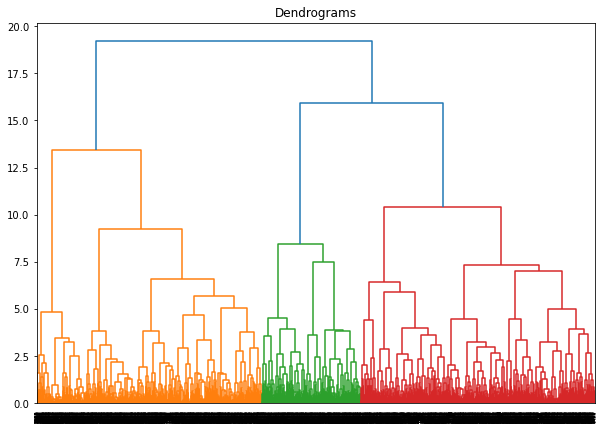

In [22]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

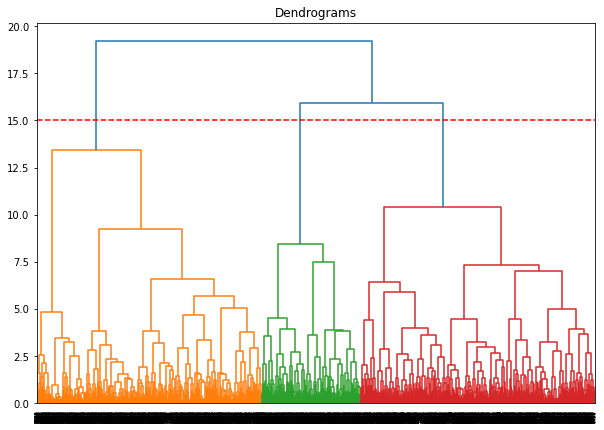

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

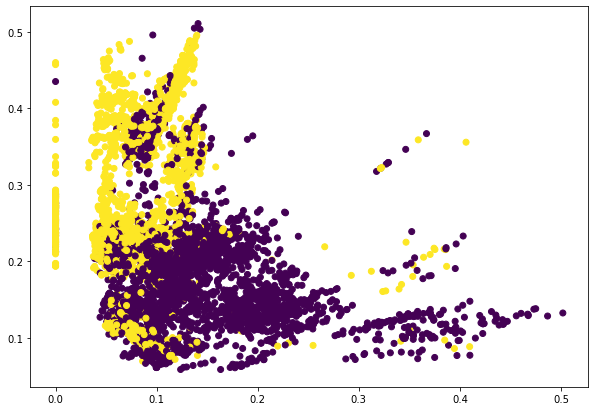

In [40]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['ratings on churches'], data_scaled['ratings on pubs/bars'], c=cluster.labels_) 

### We can see that there are basically 2 clusters possible

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
model.fit(data_scaled)

AgglomerativeClustering(linkage='average')

In [52]:
data_scaled["labels"] = model.labels_
data_scaled.sample(30)

ratings on churches  ratings on resorts  ratings on beaches  \
2469             0.046819            0.117473            0.117473   
4689             0.059344            0.104558            0.103852   
4780             0.119456            0.141328            0.142169   
1920             0.049720            0.382464            0.099441   
3052             0.141300            0.139967            0.141300   
4865             0.181224            0.431485            0.226098   
1962             0.071279            0.073579            0.118799   
1434             0.068553            0.160745            0.251360   
3537             0.112015            0.113397            0.116163   
869              0.237115            0.316153            0.434276   
1614             0.072119            0.073622            0.146492   
5088             0.070427            0.180972            0.246050   
4254             0.128235            0.130964            0.132783   
3438             0.112443            0.112443            0.113270   
1381             0.117012            0.118758            0.121378   
923              0.093402            0.094945            0.097261   
2310             0.104731            0.106272            0.108582   
4350             0.073225            0.074817            0.135307   
1973             0.087072            0.089343            0.130229   
333              0.120110            0.180165            0.196680   
2003             0.119296            0.120130            0.121798   
4889             0.078225            0.425134            0.138594   
1586             0.047302            0.051451            0.131948   
2201             0.087127            0.095180            0.366078   
3899             0.054478            0.142531            0.316735   
5389             0.208946            0.209749            0.195284   
377              0.067651            0.348714            0.348714   
1392             0.126055            0.186493            0.128645   
4057             0.093572            0.417732            0.417732   
182              0.104849            0.146177            0.145411   

      ratings on parks  ratings on threatres  ratings on museums  \
2469          0.119175              0.425625            0.123431   
4689          0.103852              0.105265            0.224659   
4780          0.143852              0.146376            0.154788   
1920          0.107855              0.107855            0.107855   
3052          0.333254              0.333254            0.214616   
4865          0.226961              0.431485            0.203661   
1962          0.383223              0.121098            0.120332   
1434          0.393982              0.393982            0.122922   
3537          0.130684              0.129992            0.130684   
869           0.231035              0.228429            0.191950   
1614          0.126208              0.125457            0.126960   
5088          0.445743              0.445743            0.363726   
4254          0.239191              0.295578            0.295578   
3438          0.413393              0.118230            0.214964   
1381          0.436612              0.436612            0.383345   
923           0.385957              0.223083            0.217680   
2310          0.385042              0.338837            0.338067   
4350          0.133715              0.132919            0.133715   
1973          0.131743              0.378572            0.236986   
333           0.375344              0.165902            0.160647   
2003          0.124301              0.417118            0.267790   
4889          0.207465              0.226171            0.232973   
1586          0.122819              0.122819            0.123649   
2201          0.207200              0.204272            0.205004   
3899          0.316735              0.316735            0.205244   
5389          0.146262              0.129386            0.103669   
377           0.175054        

## Conclusion
## By using heirarchical clustering we clustered review into two category, positive review and a negative review

In [58]:
result = data_scaled.copy()

In [59]:
result.replace({'labels' : 1} , 'Positive' , inplace=True)
result.replace({'labels' : 0} , 'Negative' , inplace= True)

In [60]:
result

ratings on churches  ratings on resorts  ratings on beaches  \
0                0.000000            0.000000            0.333580   
1                0.000000            0.000000            0.331487   
2                0.000000            0.000000            0.331762   
3                0.000000            0.045907            0.333288   
4                0.000000            0.000000            0.331762   
...                   ...                 ...                 ...   
5450             0.066725            0.366622            0.293298   
5451             0.079340            0.426561            0.342955   
5452             0.074986            0.398860            0.321481   
5453             0.072389            0.308608            0.308608   
5454             0.075086            0.321685            0.395191   

      ratings on parks  ratings on threatres  ratings on museums  \
0             0.335418              0.459476            0.268334   
1             0.333313              0.456593            0.266651   
2             0.331762              0.456972            0.266872   
3             0.333288              0.459075            0.268100   
4             0.331762              0.456972            0.266872   
...                ...                   ...                 ...   
5450          0.204575              0.203109            0.188444   
5451          0.238021              0.237168            0.219253   
5452          0.223361              0.221766            0.205014   
5453          0.214120              0.212596            0.185927   
5454          0.222888              0.221307            0.203128   

      ratings on malls  ratings on zoo  ratings on restaurants  \
0             0.459476        0.215954                0.214116   
1             0.456593        0.241081                0.212773   
2             0.456972        0.241281                0.212949   
3             0.459075        0.215765                0.213929   
4             0.456972        0.241281                0.212949   
...                ...             ...                     ...   
5450          0.178178        0.079924                0.129784   
5451          0.151003        0.091284                0.150150   
5452          0.139601        0.083761                0.139601   
5453          0.134111        0.078485                0.132587   
5454          0.191272        0.080619                0.137526   

      ratings on pubs/bars  ratings on local services  \
0                 0.242603                   0.156222   
1                 0.241995                   0.155242   
2                 0.241281                   0.155370   
3                 0.242391                   0.158840   
4                 0.241281                   0.155370   
...                    ...                        ...   
5450              0.076257                   0.074791   
5451              0.087019                   0.086165   
5452              0.079772                   0.078974   
5453              0.074675                   0.073913   
5454              0.075877                   0.075086   

      ratings on burger/pizza shops  ratings on hotels/other lodgings  \
0                          0.155303                          0.156222   
1                          0.154329                          0.155242   
2                          0.154456                          0.155370   
3                          0.155167                          0.156085   
4                          0.154456                          0.155370   
...                             ...                               ...   
5450                       0.077724                          0.094589   
5451                       0.088725                          0.108347   
5452                       0.079772                          0.086154   
5453                       0.074675                          0.080771   
5454                       0.075877                          0.079829   

     

## Inference:
## In this case study, we have grouped the customers' dataset into 2 clusters based on the google reviews they have searched on google.Created Cluster about the reviews based on the optimum number of clusters (‘k’=2) with the help of dendrogram .These clusters give information about the interest of the customer rating in the different spots.This type of clusters can helps to find whether whether it is positive or negative reviews.